<a href="https://colab.research.google.com/github/sejinkim2000/080427/blob/main/LLM03_250916.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# 지수 함수
x_exp = np.arange(-2, 2, 0.01)
y_exp = np.exp(x_exp)
y_exp_neg = np.exp(-x_exp)

# 로그 함수
x_log = np.arange(0.01, 5, 0.01)
y_log = np.log(x_log)
x_log1 = np.arange(1.01, 5, 0.01)
y_log1 = np.log(x_log1 - 1)


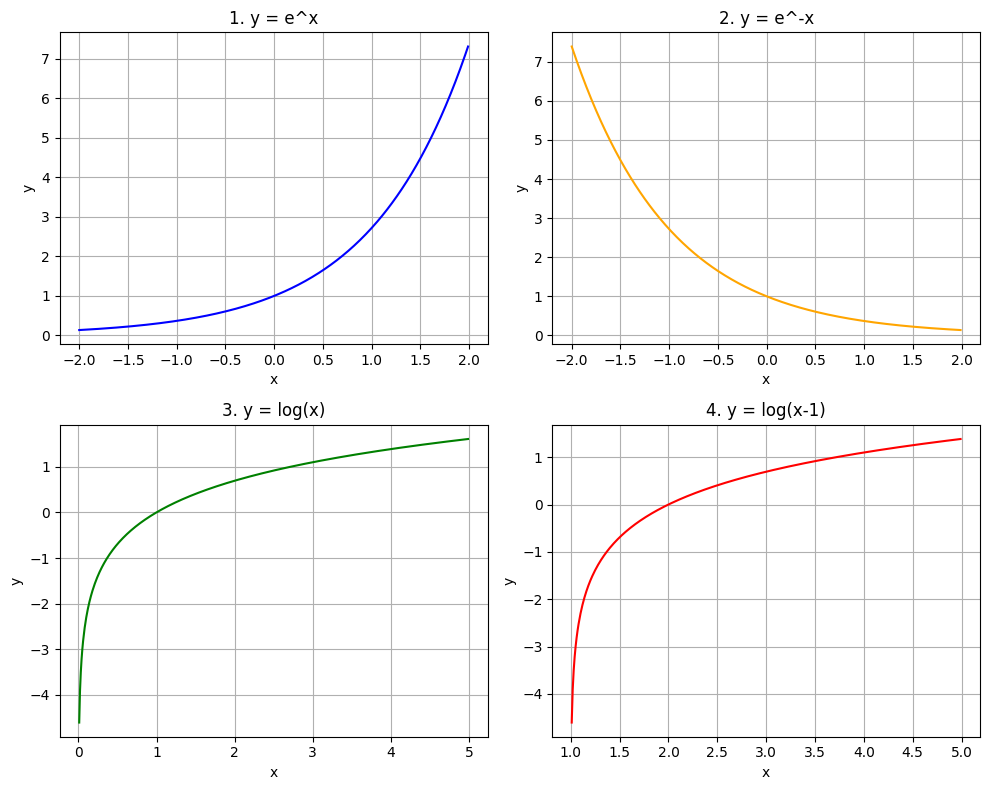

In [3]:
plt.figure(figsize=(10, 8))  # 전체 그림 크기 조정

# 1번: y = e^x
plt.subplot(2, 2, 1)
plt.plot(x_exp, y_exp, color='blue')
plt.title('1. y = e^x')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

# 2번: y = e^-x
plt.subplot(2, 2, 2)
plt.plot(x_exp, y_exp_neg, color='orange')
plt.title('2. y = e^-x')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

# 3번: y = log(x)
plt.subplot(2, 2, 3)
plt.plot(x_log, y_log, color='green')
plt.title('3. y = log(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

# 4번: y = log(x-1)
plt.subplot(2, 2, 4)
plt.plot(x_log1, y_log1, color='red')
plt.title('4. y = log(x-1)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.tight_layout()  # 그래프 간격 자동 조정
plt.show()


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# 데이터 로드
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# 정규화
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 라벨 원-핫 인코딩
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


In [9]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(1024, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,501,834 (5.73 MB)

 Trainable params: 1,497,994 (5.71 MB)

 Non-trainable params: 3,840 (15.00 KB)

In [10]:
history = model.fit(x_train, y_train_cat,
                    validation_split=0.1,
                    epochs=50,
                    batch_size=128,
                    verbose=2)


Epoch 1/50
422/422 - 13s - 32ms/step - accuracy: 0.7494 - loss: 0.7126 - val_accuracy: 0.8447 - val_loss: 0.4294
Epoch 2/50
422/422 - 2s - 4ms/step - accuracy: 0.8216 - loss: 0.4930 - val_accuracy: 0.8523 - val_loss: 0.3972
Epoch 3/50
422/422 - 3s - 6ms/step - accuracy: 0.8362 - loss: 0.4612 - val_accuracy: 0.8432 - val_loss: 0.4348
Epoch 4/50
422/422 - 3s - 7ms/step - accuracy: 0.8417 - loss: 0.4439 - val_accuracy: 0.8473 - val_loss: 0.4057
Epoch 5/50
422/422 - 2s - 4ms/step - accuracy: 0.8462 - loss: 0.4262 - val_accuracy: 0.8545 - val_loss: 0.3971
Epoch 6/50
422/422 - 2s - 6ms/step - accuracy: 0.8507 - loss: 0.4154 - val_accuracy: 0.8620 - val_loss: 0.3664
Epoch 7/50
422/422 - 2s - 4ms/step - accuracy: 0.8527 - loss: 0.4097 - val_accuracy: 0.8570 - val_loss: 0.3892
Epoch 8/50
422/422 - 3s - 6ms/step - accuracy: 0.8571 - loss: 0.3995 - val_accuracy: 0.8682 - val_loss: 0.3723
Epoch 9/50
422/422 - 3s - 6ms/step - accuracy: 0.8591 - loss: 0.3915 - val_accuracy: 0.8613 - val_loss: 0.3786

Test accuracy: 0.8897
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


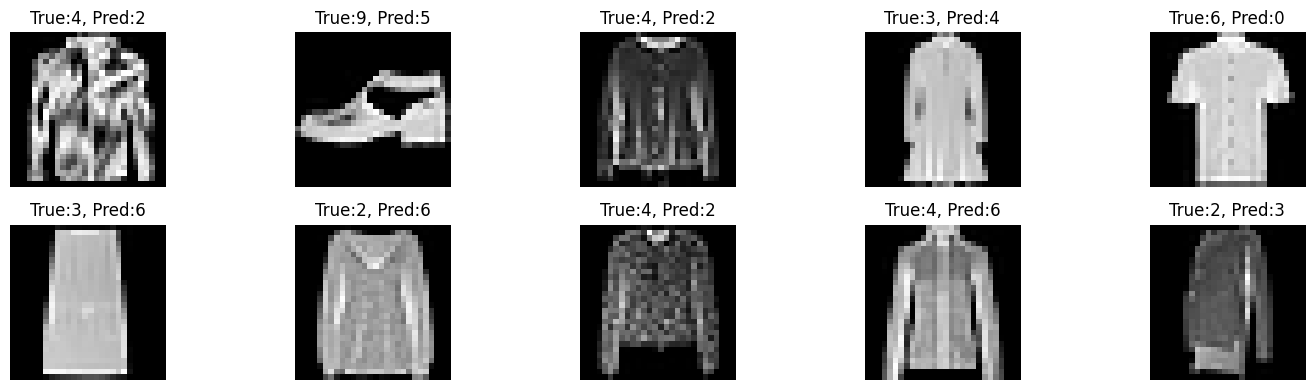

In [11]:
# 테스트 정확도 평가
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f'Test accuracy: {test_acc:.4f}')

# 틀린 사례 확인
y_pred = np.argmax(model.predict(x_test), axis=1)
wrong_indices = np.where(y_pred != y_test)[0]

plt.figure(figsize=(15,4))
for i, idx in enumerate(wrong_indices[:10]):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f'True:{y_test[idx]}, Pred:{y_pred[idx]}')
    plt.axis('off')
plt.tight_layout()
plt.show()
